<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:35px;background-color:#FFDE00">
    <span style="color: black;">  🎬 IMDB Movies Rating Prediction 🎬 </span>
</h3>

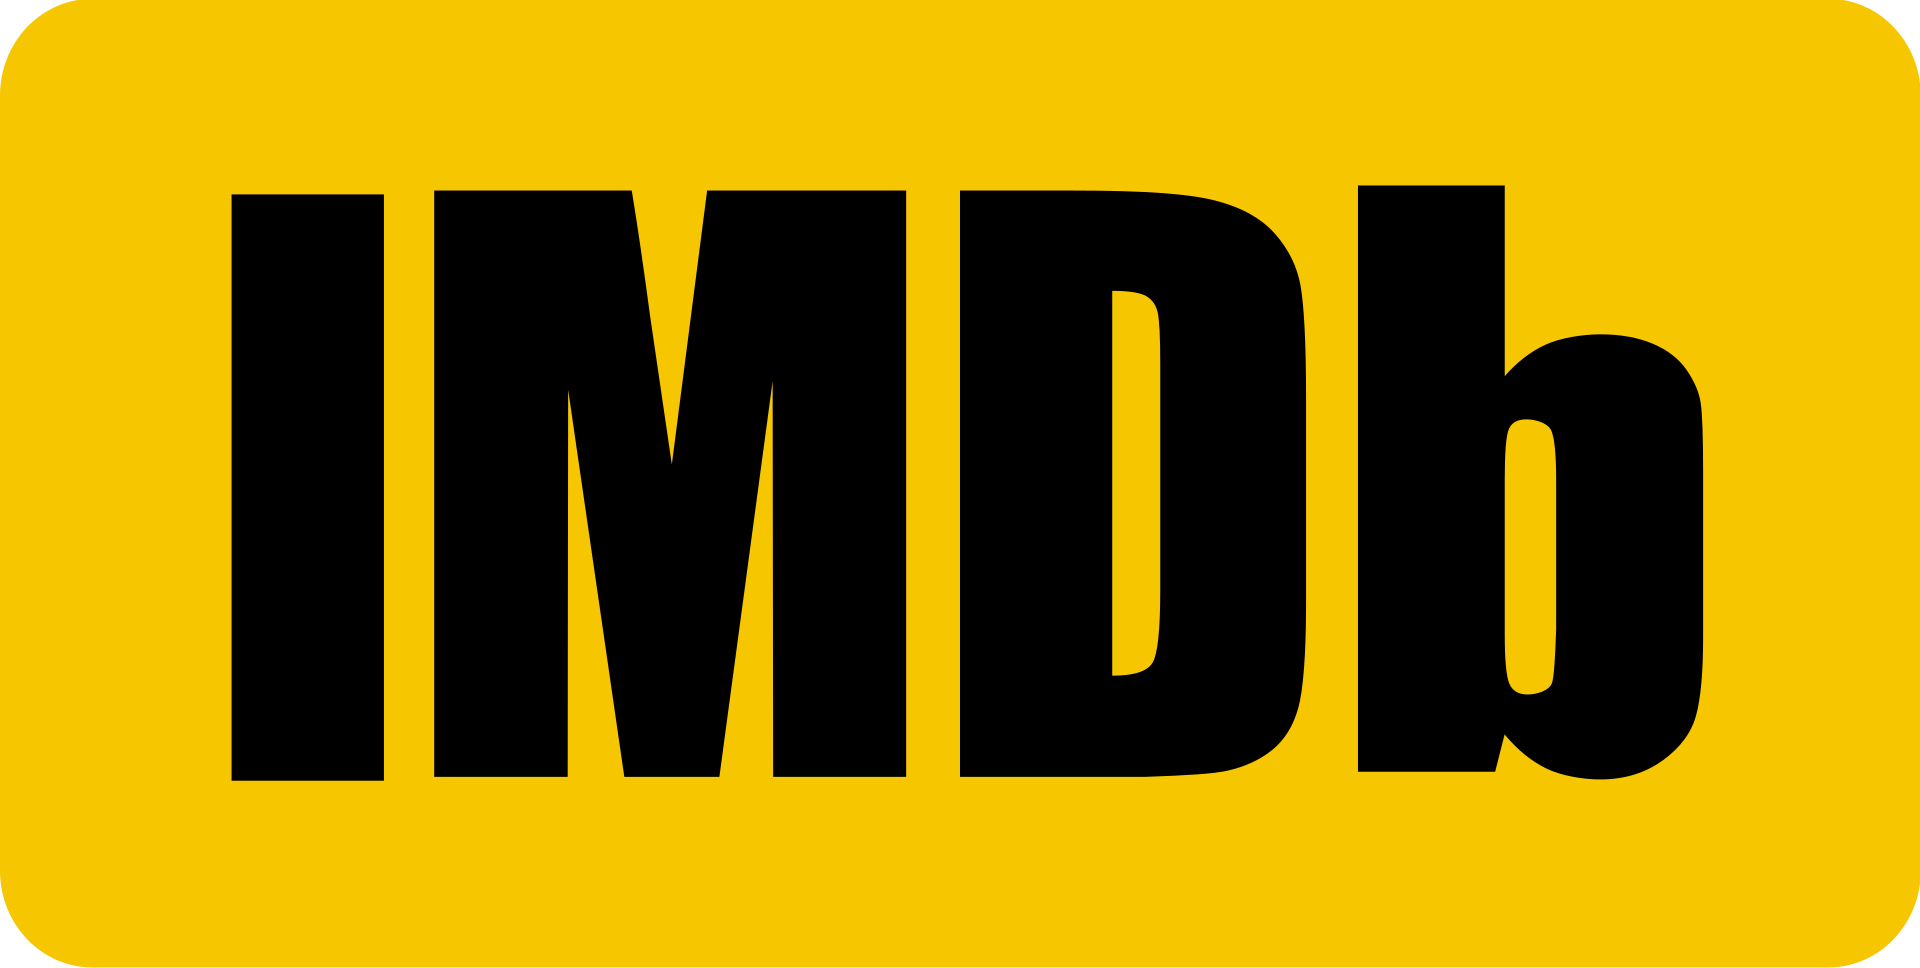

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">📚 Importing Libraries 📚 </span>
</h3>

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⏳ Loading the dataset ⏳</span>
</h3>

In [31]:
imdb = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🧠 Understanding of data 🧠</span>
</h3>

In [32]:
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [33]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🧹 Data Cleaning 🧹</span>
</h3>

In [34]:
# Checking null values

imdb.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [35]:
# Locating rows with missing values in columns from 1 to 9

nulls = imdb[imdb.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Checking if there are any typos

for col in imdb.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(imdb[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [37]:
# Handling the null values
imdb.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

#Extracting only the text part from the Name column
imdb['Name'] = imdb['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column as observed above
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
imdb['Duration'] = pd.to_numeric(imdb['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
imdb['Genre'] = imdb['Genre'].str.split(', ')
imdb = imdb.explode('Genre')
imdb['Genre'].fillna(imdb['Genre'].mode()[0], inplace=True)

# Convert 'Votes' to numeric and replace the , to keep only numerical part
imdb['Votes'] = pd.to_numeric(imdb['Votes'].str.replace(',', ''), errors='coerce')

In [38]:
#checking duplicate values by Name and Year

duplicate = imdb.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [39]:
# Dropping the duplicated values by Name
imdb = imdb.drop_duplicates(subset=['Name'], keep=False)

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* **Every column had null values** except name column
* We also found that the following columns: **Name, Year, Duration, Genre, and Votes had typos that were corrected later**
* The null values in most of the columns were **dropped and for Genre, it was filled with the mode value**
* Later, we checked the duplicated values and **dropped them based on Name column**

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">📊 Exploratory Data Analysis 📊</span>
</h3>

---
### Descriptive Analysis
---

In [40]:
imdb.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [41]:
imdb.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


In [42]:
# Find the row with the highest number of votes
max_votes_row = imdb[imdb['Votes'] == imdb['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes_row = imdb[imdb['Votes'] == imdb['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

Movie with the highest votes: My Name Is Khan
Number of votes for the movie with the highest votes: 101014


Movie with the highest votes: Anmol Sitaare
Number of votes for the movie with the highest votes: 5


In [43]:
# Find the row with the highest rating
max_rating_row = imdb[imdb['Rating'] == imdb['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '='*100, '\n')


# Find the row with the lowest rating
min_rating_row = imdb[imdb['Rating'] == imdb['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)

Movie with the highest rating: June
Number of votes for the movie with the highest rating: 18


Movie with the highest rating: Mumbai Can Dance Saalaa
Number of votes for the movie with the highest rating: 43


In [44]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '='*100, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: Kanti Shah
Number of movies directed by Kanti Shah : 13


Director with the most movies directed: Sikandar Khanna
Number of movies directed by Kanti Shah : 1


<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The analysis revealed that **the first year is 1931 in the dataset and there's a movie that have just 45 min duration**
* Furthermore, the **drame genre is quite famous** and first main actor with highest count is **Mithun**
* The analysis also reveals about the best performing and worst movies based on votes and ratings as can be seen above
* Information about directors who directed most and least of the movies can be seen above

---
### Univariate Anaysis
---

In [45]:
fig_year = px.histogram(imdb, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()

In [46]:
fig_duration = px.histogram(imdb, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

In [47]:
fig_rating = px.histogram(imdb, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [48]:
fig_votes = px.box(imdb, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The distribution of **Year is skewed towards left** with a high concentration of movies directed in between **2015-2019** 
    
* The **duration of movies has a guassian distribution** with a very few outliers
    
* The distribution of **Rating is also having a guassian distribution** with a high concentration of **6.6 and 6.7** 
    
* The **number of votes** has a **plenty of outliers**

---
### Bivariate Analysis
---

In [49]:
year_avg_rating = imdb.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')  
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

In [50]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [51]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [52]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = imdb['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=['#559C9E', '#0B1F26', '#00CC96'])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

In [53]:
fig_dur_rat = px.scatter(imdb, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating", color_continuous_scale = "darkmint")
fig_dur_rat.update_layout(title='Does length of movie have any impact on rating?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_rat.show()

In [54]:
fig_dur_votes = px.scatter(imdb, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_dur_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()


In [55]:
fig_rat_votes = px.scatter(imdb, x = 'Rating', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_rat_votes.update_layout(title='Does Ratings of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rat_votes.show()

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The **Year with highets rating on average is 1944**.
* We can also see that from **1984, there is a downward trend for ratings until 1993**, and the **Fare **
* Then after **2013, there is a conntinous upward trend for movies rating**
* Furthermore, the insights reveal that in **Year 2010, some movies were released that have the highest votes on average**
* Moreover, in terms of **Genre, the Drama has the highest rating since it's start** 
* It can be observed that **Comedy Genre was started in 1953 and the year 1964 was the start of Action Genre**
* The **Short duration movies seems to get high ratings and votes**, signifying that people may get bored with long duration movies

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⚙️ Data Preprocessing ⚙️</span>
</h3>

In [56]:
# Dropping non essential columns
imdb.drop('Name', axis = 1, inplace = True)

---
### 1. Feature Engineering
---

In [57]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb.groupby('Actor 1')['Rating'].transform('mean')
imdb['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb.groupby('Actor 2')['Rating'].transform('mean')
imdb['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb.groupby('Actor 3')['Rating'].transform('mean')
imdb['Actor3_encoded'] = actor3_mean_rating

---
### 2. Splitting into training and testing
---

In [58]:
# Keeping the predictor and target variable

X = imdb[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb['Rating']

In [59]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🎯 Model Building 🎯 </span>
</h3>

In [60]:
# Building 2 machine learning models and training them

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⚡ Model Evaluation ⚡ </span>
</h3>

In [61]:
# Evaluating the performance of trained algos

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.13007622782536266
Mean absolute error:  0.2507994097724829
R2 score:  0.935188545523222


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.11431140196078421
Mean absolute error:  0.1897222222222222
R2 score:  0.9430434880514464


<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The performance evaluation revealed that **Random Forest performed well** than the Logistic Regression in terms of, **r2_score which is 0.94**

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:35px;background-color:#FFDE00">
    <span style="color: black;">  🔎 Model Testing 🔎 </span>
</h3>

In [62]:
# Checking a sample of predictor values on whom the model is trained
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [63]:
# Checking the rating according to above predictor variables
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [64]:
# Creating a new dataframe with values close to the 3rd row according to the sample above 

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [65]:
# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.853999999999996


<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* We took the original data from **X.head()** and created a new dataframe almost similar to **row 3**. The **original rating was 5.9**. Out trained random forest regressor predicted **5.85 on unseen data**. Therefore, showing the robustness of model. 

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🎈 Conclusion 🎈 </span>
</h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>Conclusion:</font></h3>
    
---    
In this Jupyter notebook project, we embarked on a journey to analyze and predict movie ratings. We encountered a variety of data challenges, such as missing values, typos in column names, and duplicated records. Through a series of data cleaning and preprocessing steps, we were able to prepare the dataset for analysis. Our analysis uncovered several interesting insights about the movie dataset. We observed trends in movie durations, genre popularity, the most prolific actors and directors, and the distribution of movie ratings and votes over the years. Notably, we found that short-duration movies tend to receive higher ratings and votes, and the Drama genre has consistently performed well in terms of ratings. Furthermore, our evaluation of machine learning models revealed that Random Forest outperformed Linear Regression, with an impressive R-squared score of 0.94 on unseen data, highlighting the model's robustness.

 ---   
**Insights:**

Following are the main insights:    
    
- Data cleaning was essential, involving the correction of typos and handling missing/duplicated values.
- We explored the temporal dimension of the data, noting the first entry in 1931 and a movie with just 45 minutes of duration.
- Mithun is the most frequently appearing lead actor
- We identified both the best and worst-performing movies in terms of votes and ratings.
- Insights on directors with the most and least movies were gained.
- The distribution of movies over the years is skewed, with a concentration in the 2015-2019 period.
- In 2010, some movies had the highest average votes.

- Short-duration movies tend to receive higher ratings and votes, indicating a potential preference for shorter films.
- Drama is a consistently popular genre, while Comedy and Action genres had their origins in 1953 and 1964, respectively.
- The distribution of ratings and votes follows Gaussian-like patterns, with specific peaks and trends over time.
- Random Forest regression outperformed Linear Regression with an R-squared score of 0.94, indicating its robustness.


Through our analysis, we gained a deep understanding of the dataset and its trends. This knowledge can be leveraged to make informed decisions regarding movie production, genres, and more. Future work could involve building more advanced machine learning models or diving deeper into specific genres or time periods to uncover additional insights.

---    
    
**What's next?** 
    
To further enhance this project, one can consider the following:

- Explore additional machine learning models and fine-tune their parameters to improve rating prediction accuracy.

- Investigate the relationships between various features, such as the impact of specific actors, directors, or genres on movie ratings.

- Conduct sentiment analysis on movie reviews or incorporate external data sources to gain more insights into factors influencing movie ratings.

- Create visualizations and dashboards to make the insights more accessible and engaging for stakeholders.

- Continue updating the dataset with new movie releases and ratings for ongoing analysis and predictions.
    
---